In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling

In [2]:
#пути к файлам csv с обучающим и тестовым датасетами

TRAIN_DATASET_PATH = 'C:/Users/sklod/OneDrive/Рабочий стол/STUDY/!PRACTICUM/Q3.Data_Analysis/train.csv'
TEST_DATASET_PATH = 'C:/Users/sklod/OneDrive/Рабочий стол/STUDY/!PRACTICUM/Q3.Data_Analysis/test.csv'

In [3]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [4]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


In [5]:
# информация по признакам и типам в обучающем и тестовом датасете соответствует, за исключением choose

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  choose               10000 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [7]:
#пропусков нет

#train_df.isnull().sum()
test_df.isnull().sum()

Id                     0
age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
mean_exam_points       0
dtype: int64

In [8]:
# существенных выбросов в данных нет

train_df.describe()
#test_df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,9999.00000,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


In [9]:
#можно добавить признак, который будет отображать, сколько предметов ведет преподаватель,

columns = ['physics', 'chemistry', 'biology', 'english', 'geography', 'history']
train_df['qualification_items'] = train_df[columns].sum(axis=1)
test_df['qualification_items'] = test_df[columns].sum(axis=1)

#это тоже показательно - это специалист широкого профиля или узкоквалифицированный учитель
train_df.groupby('qualification_items')['choose'].value_counts()

qualification_items  choose
0.0                  0         4174
                     1          207
1.0                  0         3670
                     1          582
2.0                  0          946
                     1          270
3.0                  0           97
                     1           50
4.0                  0            4
Name: choose, dtype: int64

судя по данным, узкоквалифицированные специалисты вызывают больше доверия, чем преподаватели, которые ведут несколько предметов

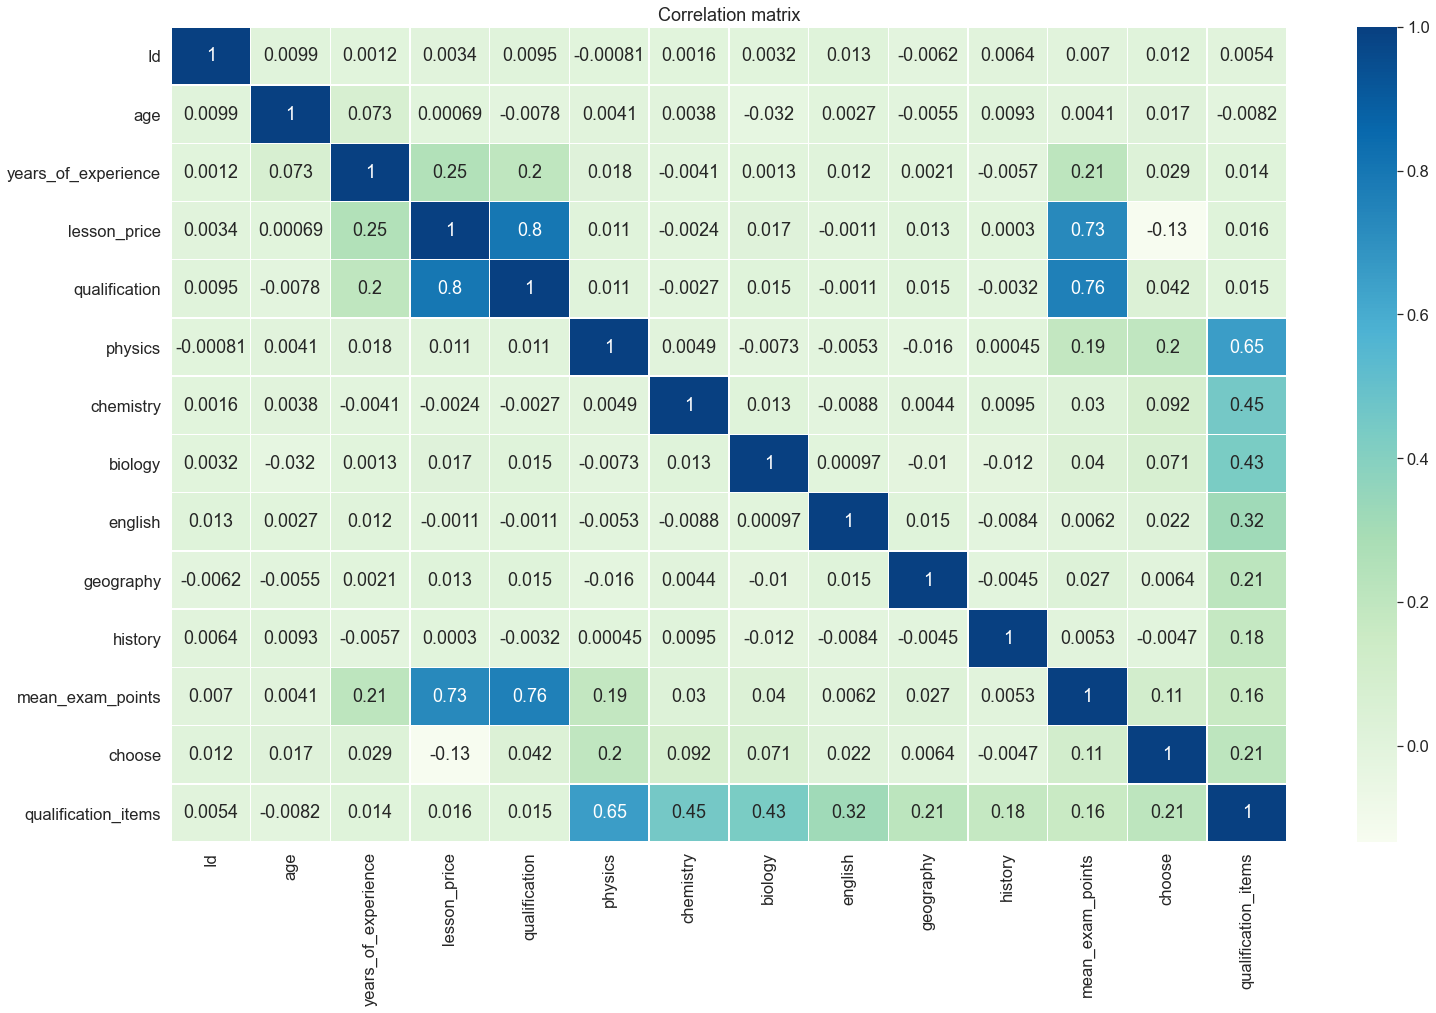

In [10]:
# изучим степень корреляции всех признаков между собой и с целевой переменной.

plt.figure(figsize = (25,15))

sns.set(font_scale=1.5)
sns.heatmap(train_df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

Получаейтся, что стоимость - один из решающих факторов, т.к. чем выше квалификация преподавателя и выше средний бал, тем выше стоимость. Также преимущество имеют те преподаватели, которые ведут физику

In [11]:
#видим, что набор данных не сбалансирован

train_df["choose"].value_counts()

0    8891
1    1109
Name: choose, dtype: int64

In [12]:
#балансировка целевой переменной
from imblearn.over_sampling import SMOTE

balance = SMOTE()
X_balance, y_balance = balance.fit_sample(train_df.drop(columns='choose'), train_df['choose'])
X_balance = pd.DataFrame(data=X_balance, columns=train_df.drop(columns='choose').columns)
y_balance = pd.Series(y_balance, name='choose')
train_df_balance = pd.concat([X_balance, y_balance], axis=1)
    
train_df_balance['choose'].value_counts()

1    8891
0    8891
Name: choose, dtype: int64

In [13]:
train_df_balance.columns

Index(['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points', 'qualification_items', 'choose'],
      dtype='object')

In [14]:
#масштабирование

columns_st = ['age', 'years_of_experience', 'lesson_price', 'qualification',
              'mean_exam_points', 'qualification_items']

def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

train_df_blst = train_df_balance.copy()
test_df_st = test_df.copy()
train_df_blst[columns_st] = standard_scale(train_df_balance[columns_st])
test_df_st[columns_st] = standard_scale(test_df[columns_st])


In [15]:
train_df_blst.describe()
#test_df_st.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,qualification_items,choose
count,17782.000000,1.778200e+04,1.778200e+04,1.778200e+04,1.778200e+04,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,1.778200e+04,1.778200e+04,17782.000000
mean,5032.256720,3.466105e-14,-1.636628e-15,5.134154e-15,-4.584643e-15,0.491296,0.158965,0.148534,0.064727,0.028119,0.017917,-6.503377e-15,-7.117765e-15,0.500000
std,2862.289007,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.466504,0.331007,0.323188,0.224759,0.151755,0.123908,1.000000e+00,1.000000e+00,0.500014
min,0.000000,-3.090630e+00,-1.194133e+00,-2.790610e+00,-9.462753e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.626857e+00,-1.253454e+00,0.000000
25%,2571.000000,-6.689258e-01,-8.249175e-01,-7.228591e-01,-9.462753e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.534312e-01,-1.253454e+00,0.000000
50%,5073.000000,3.769669e-03,-6.522465e-03,-3.084812e-01,-2.042102e-02,0.460894,0.000000,0.000000,0.000000,0.000000,0.000000,-1.008721e-01,1.246349e-01,0.500000
75%,7504.750000,6.764652e-01,5.872826e-01,8.525699e-01,2.939752e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.095611e-01,3.535729e-01,1.000000
max,9999.000000,2.963630e+00,4.150113e+00,4.594214e+00,2.774476e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.661924e+00,4.258902e+00,1.000000


In [16]:
# Я решила оставить все признаки, кроме ID

features = train_df_blst.columns.drop('Id').drop('choose')
target = train_df_blst['choose']
X = np.array(train_df_blst[features])
y = np.array(target)

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

In [18]:
#функция calc_logloss измененнная так, чтобы нули по возможности не попадали в np.log.

def calc_logloss(y, y_pred):
    eps = 1e-8
    y_pred = np.clip(y_pred, eps, 1 - eps)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [19]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = 1 / (1 + np.exp(-z))
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
            
    final_error = calc_logloss(y, y_pred)
    return W, final_error

In [20]:
def calc_pred_proba(X, W):
    z = np.dot(X, W)
    y_pred_proba = 1 / (1 + np.exp(-z))
    return y_pred_proba

In [21]:
#вручную подобрала наиболее оптимальные параметры

W, error = eval_model(X_train, y_train, iterations=5000, eta=0.8)

0 [ 0.44724797 -0.13688886  0.36131425  1.32486013 -0.14583119 -0.20379944
  1.58430923  0.77015095 -0.46627495  0.54271232 -0.52922713 -0.27966499] 1.1873750875099953
500 [ 0.01989052 -0.13238669 -3.30008633  1.48303035  0.01663566 -0.26591642
 -0.24230779 -0.6726882  -0.77119884 -0.52124738  1.76306984  0.84695294] 0.44287998129761125
1000 [ 0.01892334 -0.13722164 -3.3332004   1.50411079  0.02211193 -0.28087079
 -0.2587774  -0.76674854 -0.87321358 -0.96180865  1.77218652  0.87332344] 0.44229105556599213
1500 [ 0.01858972 -0.13841722 -3.33740818  1.50732337  0.02487416 -0.28537513
 -0.26182514 -0.77646892 -0.90344746 -1.14897561  1.77250951  0.88057746] 0.44219474808789266
2000 [ 0.01845722 -0.13890347 -3.33906106  1.50853787  0.02600884 -0.28726446
 -0.26304058 -0.77878701 -0.91311725 -1.22833934  1.77269424  0.88343414] 0.44217768267163804
2500 [ 0.01840361 -0.13910956 -3.33978043  1.50905077  0.02648276 -0.28807311
 -0.2635533  -0.77967315 -0.91647099 -1.26202507  1.77279629  0.884

In [22]:
y_train_proba_LR = calc_pred_proba(X_train, W)
y_valid_proba_LR = calc_pred_proba(X_valid, W)

In [23]:
def roc_auc(y_proba, y_true):
    TPR = []
    FPR = []
    tresholds = np.linspace(0, 1, 20)

    for treshold in tresholds:
        y_pred = np.where(y_proba >= treshold, 1, 0)

        TP = np.sum((y_true == y_pred) & (y_pred == 1))
        FP = np.sum((y_true != y_pred) & (y_pred == 1))
        TN = np.sum((y_true == y_pred) & (y_pred == 0))
        FN = np.sum((y_true != y_pred) & (y_pred == 0))

        tpr = TP / (TP + FN); TPR.append(tpr)
        fpr = FP / (FP + TN); FPR.append(fpr)

    AUC_ROC = np.abs(np.trapz(TPR, FPR))
    x = np.linspace(0, 1, 50)
    y = x

    plt.title('ROC curve')
    plt.ylim(0, 1.05)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.legend(' ', title=f'AUC-ROC={AUC_ROC:.3f}', loc='lower right')
    plt.plot(FPR, TPR)
    
    return f'ROC AUC score = {AUC_ROC:.4f}'

Train ROC AUC score: ROC AUC score = 0.8702
Valid ROC AUC score: ROC AUC score = 0.8685


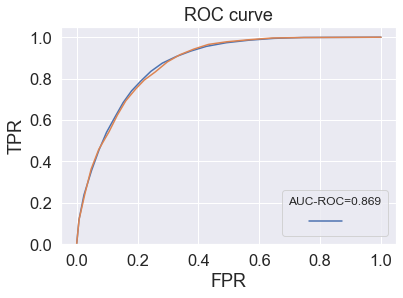

In [24]:
train_roc = roc_auc(y_train_proba_LR, y_train)
valid_roc = roc_auc(y_valid_proba_LR, y_valid)

print(f'Train ROC AUC score: {train_roc}',
      f'Valid ROC AUC score: {valid_roc}', sep='\n')

## KNN

In [48]:
def e_metrics(x1, x2):

    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [49]:
def knn(x_train, y_train, x_test, k, weights=None):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for i, d in enumerate(sorted(test_distances)[0:k]):
            w = weights(i, d[0]) if weights else 1
            
            classes[d[1]] += w

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [50]:
def weights_n_neighbor(i, d):
    q = 0.6
    return q ** i

In [52]:
k = 20

y_pred_train_knn = knn(X_train, y_train, X_train, k)
y_pred_valid_knn = knn(X_train, y_train, X_valid, k)

Train ROC AUC score: ROC AUC score = 0.7234
Valid ROC AUC score: ROC AUC score = 0.6878


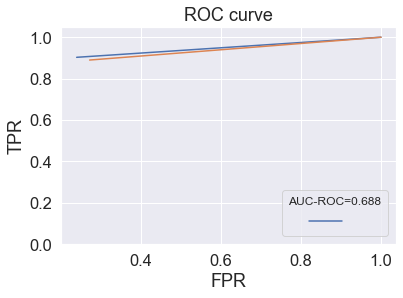

In [54]:
train_roc = roc_auc(y_pred_train_knn, y_train)
valid_roc = roc_auc(y_pred_valid_knn, y_valid)

print(f'Train ROC AUC score: {train_roc}',
      f'Valid ROC AUC score: {valid_roc}', sep='\n')

## GRADIENT BOOSTING

Построение деревьев для классификации через классы

In [25]:
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [26]:
class Leaf_clsf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
            
        # найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction        

In [27]:
# Класс дерева

class BaseTree:

    def __init__(self,
                 max_depth,
                 max_leaf_nodes,
                 min_leaf_samples,
                 leaf_class):
        self.max_depth = max_depth
        self.nodes = []
        self.leaves = []
        self.depth = 0
        self.max_leaves = max_leaf_nodes
        self.min_objects = min_leaf_samples
        self.tree = None
        self.Leaf = leaf_class
        
    # Разбиение датасета в узле
    def split(self,
              data,
              labels,
              column_index,
              t):

        left = np.where(data[:, column_index] <= t)
        right = np.where(data[:, column_index] > t)

        true_data = data[left]
        false_data = data[right]

        true_labels = labels[left]
        false_labels = labels[right]

        return true_data, false_data, true_labels, false_labels
    
    # Расчет прироста
    def gain(self,
             left_labels,
             right_labels,
             root):

        # доля выборки, ушедшая в левое поддерево
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])

        return root - p * self.criterion(left_labels) - (1 - p) * self.criterion(right_labels)   
    
    # Нахождение наилучшего разбиения
    def find_best_split(self,
                        data,
                        labels):

        #  обозначим минимальное количество объектов в узле
        min_samples_leaf = 5

        root = self.criterion(labels)

        best_gain = 0
        best_t = None
        best_index = None

        n_features = data.shape[1]

        for index in range(n_features):
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique(data[:, index])

            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
                #  пропускаем разбиения, в которых в узле остается менее 5 объектов
                if len(true_data) < min_samples_leaf or len(false_data) < min_samples_leaf:
                    continue

                current_gain = self.gain(true_labels, false_labels, root)

                #  выбираем порог, на котором получается максимальный прирост качества
                if current_gain > best_gain:
                    best_gain, best_t, best_index = current_gain, t, index

        return best_gain, best_t, best_index
    
    # Построение дерева с помощью рекурсивной функции
    def build_tree(self,
                   data,
                   labels):

        gain, t, index = self.find_best_split(data, labels)
        
        # ИЗМЕНЕНИЯ: здесь добавила базовые случаи для остановки построения дерева
 
        #  Базовый случай 2 - прекращаем рекурсию, когда достигли максимальной глубины дерева
        if self.depth > self.max_depth:
            self.leaves.append(self.Leaf(data, labels))
            return self.Leaf(data, labels)
        
        #  Базовый случай 3 - прекращаем рекурсию, когда достигли максимального количества листьев
        if len(self.leaves) >= self.max_leaves - 1 or self.depth >= self.max_leaves - 1:
            self.leaves.append(self.Leaf(data, labels))
            return self.Leaf(data, labels)
        
        #  Базовый случай 4 - прекращаем рекурсию, когда достигли минимального количества объектов в листе
        if len(data) <= self.min_objects:
            self.leaves.append(self.Leaf(data, labels))
            return self.Leaf(data, labels)
        
         #  Базовый случай 1 - прекращаем рекурсию, когда нет прироста в качества
        if gain == 0:
            self.leaves.append(self.Leaf(data, labels))
            return self.Leaf(data, labels)

        self.depth += 1
        
        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)

        # Рекурсивно строим два поддерева
        true_branch = self.build_tree(true_data, true_labels)
        false_branch = self.build_tree(false_data, false_labels)

        # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
        self.nodes.append(Node(index, t, true_branch, false_branch))
        return Node(index, t, true_branch, false_branch)
    
    def predict_object(self,
                       obj,
                       node):

        #  Останавливаем рекурсию, если достигли листа
        if isinstance(node, self.Leaf):
            answer = node.prediction
            return answer

        if obj[node.index] <= node.t:
            return self.predict_object(obj, node.true_branch)
        else:
            return self.predict_object(obj, node.false_branch)
    
    def fit(self, data, labels):
        self.tree = self.build_tree(data, labels)
        return self
    
    def predict(self, data):
    
        classes = []
        for obj in data:
            prediction = self.predict_object(obj, self.tree)
            classes.append(prediction)
        return classes

In [28]:
class Classification_Tree(BaseTree):
    def __init__(self,
                 max_depth=np.inf,
                 max_leaf_nodes=np.inf,
                 min_leaf_samples=1,
                 leaf_class=Leaf_clsf):
        super().__init__(max_depth=max_depth,
                         max_leaf_nodes=max_leaf_nodes,
                         min_leaf_samples=min_leaf_samples,
                         leaf_class=Leaf_clsf)

    # Расчет критерия Джини
    def criterion(self,
                  labels):
        #  подсчет количества объектов разных классов
        classes = {}
        for label in labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1

        #  расчет критерия
        impurity = 1
        for label in classes:
            p = classes[label] / len(labels)
            impurity -= p ** 2

        return impurity

In [29]:
#функция подсчета ошибки

def get_error(pred, y):
    return sum(pred != y) / len(y)

In [30]:
#алгоритм бустинга

def adaboost(X, y, N):

    # Размер выборки
    n_objects = len(X)

    # Запишем количество классов в переменную
    n_classes = len(np.unique((y)))

    # Начальные веса объектов
    w = np.ones(n_objects) / n_objects

    # Деревья с весами будем записывать в список
    models = []

    for n in range(N):
        # Зададим дерево и обучим его
        clf = Classification_Tree(max_depth=5)
        clf.fit(X_train, y_train)

        predictions = clf.predict(X)
        error = get_error(predictions, y)
        
        # отбросим дерево, если его ошибка больше 0.5
        # Запишем условие в общем виде (применимо к небинарным классификаторам)
        if error >= 1 - 1/n_classes: 
            continue

        # Обработаем граничные значения ошибок
        if error == 0:
            error += 1e-10
   
        # Вычислим вес для дерева
        alpha = 0.5 * np.log((1 - error) / error)


        # Найдем индексы правильно классифицированных элементов
        wrong_mask = predictions != y

        # Увеличим веса для неправильно классифицированных элементов
        w[wrong_mask] *= np.exp(alpha)
        # Уменьшаем веса для правильно классифицированных элементов
        w[~wrong_mask] *= np.exp(-alpha)

        # Нормализуем веса
        w /= w.sum()

        # Добавим дерево с весом в список
        models.append((alpha, clf))
    
    return models

In [33]:
#обучим алгоритм из 50 деревьев

N = 10

models = adaboost(X_train, y_train, N)

In [34]:
np.zeros((10, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [38]:
def predict_ada(X, models):
    
    n_classes = 2
    n_objects = len(X)
    
    # вначале обозначим предсказание нулевым массивом
    y_pred = np.zeros((n_objects, n_classes))
    
    for alpha, clf in models:
        prediction = clf.predict(X)
        # Для каждого предсказания будем прибавлять alpha к
        # элементу с индексом предсказанного класса
        y_pred[range(n_objects), prediction] += alpha
    
    # выберем индексы с максимальными суммарными весами -
    # получим предсказанные алгоритмом классы
    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

In [36]:
print(f'Точность алгоритма на обучающей выборке: {(1 - get_error(predict(X_train, models), y_train)) * 100:.3f}')

Точность алгоритма на обучающей выборке: 75.424


Train ROC AUC score: ROC AUC score = 0.6128
Valid ROC AUC score: ROC AUC score = 0.5893


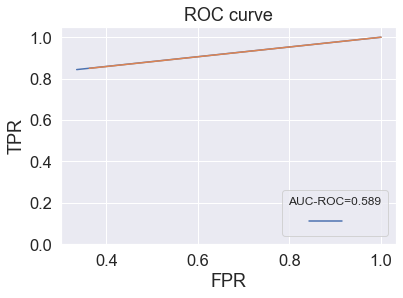

In [40]:
train_roc = roc_auc(predict_ada(X_train, models), y_train)
valid_roc = roc_auc(predict_ada(X_valid, models), y_valid)

print(f'Train ROC AUC score: {train_roc}',
      f'Valid ROC AUC score: {valid_roc}', sep='\n')